## Project 6: EDA from Scratch

Author: [Chau Palma]

Repository: [Datafun-06-eda] https://github.com/chaupalma81-commits/datafun-06-eda

Purpose: Demonstrate my ability to create a project from scratch, importing a dataset, inspecting it, and executing EDA.

Date: 2026-02-16

# Dataset Information

Dataset: Dowjones

Description: Dowjones industrial stock price index for USA from 1914-1968

Source: Imported from Seaborn

Citation: https://fred.stlouisfed.org/series/M1109BUSM293NNBR

Access: Available from Seaborn

## Section 1: Importing Libraries

Standard process in which you load the libraries needed for this project.

In [37]:
# Importing data sources and visualization libraries

from matplotlib.axes import Axes  # noqa: F401
from matplotlib.figure import Figure  # noqa: F401
import matplotlib.pyplot as plt  # noqa: F401
import numpy as np  # noqa: F401
import pandas as pd
import seaborn as sns

# Pandas display configuration (helps in notebooks)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete.")

print(sns.get_dataset_names())

Imports complete.
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Section 2: Loading Dataset 

Standard process to load the dataset that will be used.

In [38]:
# Loading the dowjones dataset from seaborn's built-in datasets
dowjones = sns.load_dataset("dowjones")

# Displaying the first few rows of the dowjones dataset
print(dowjones.head())
print("Dow Jones dataset loaded.")

        Date  Price
0 1914-12-01  55.00
1 1915-01-01  56.55
2 1915-02-01  56.00
3 1915-03-01  58.30
4 1915-04-01  66.45
Dow Jones dataset loaded.


## Section 3: Inspecting Data shape and structure.

Standard process to get data shape and structure. 

In [39]:
# Getting the shape of the dowjones dataset
shape: tuple[int, int] = dowjones.shape

# Printing the shape of the dowjones dataset
print(f"The dowjones dataset has {shape[0]} rows and {shape[1]} columns.")

# Displaying Column names and their data types

dowjones.info()

# Describe the dataset to get summary statistics

print(dowjones.describe())

The dowjones dataset has 649 rows and 2 columns.
<class 'pandas.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[us]
 1   Price   649 non-null    float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 10.3 KB
                             Date       Price
count                         649  649.000000
mean   1941-11-30 17:42:48.258860  290.807319
min           1914-12-01 00:00:00   46.850000
25%           1928-06-01 00:00:00  106.900000
50%           1941-12-01 00:00:00  172.270000
75%           1955-06-01 00:00:00  436.730000
max           1968-12-01 00:00:00  985.930000
std                           NaN  256.062906


## Section 4: Obtaining Initial Data Distribution for Price and Date Columns

Purpose is to get some data distribution for our columns and presenting it as a histogram and other chart types.

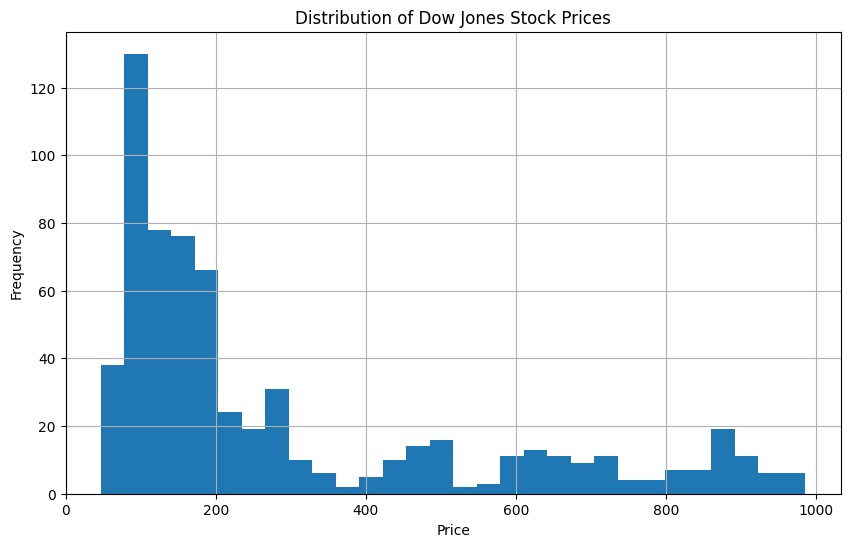

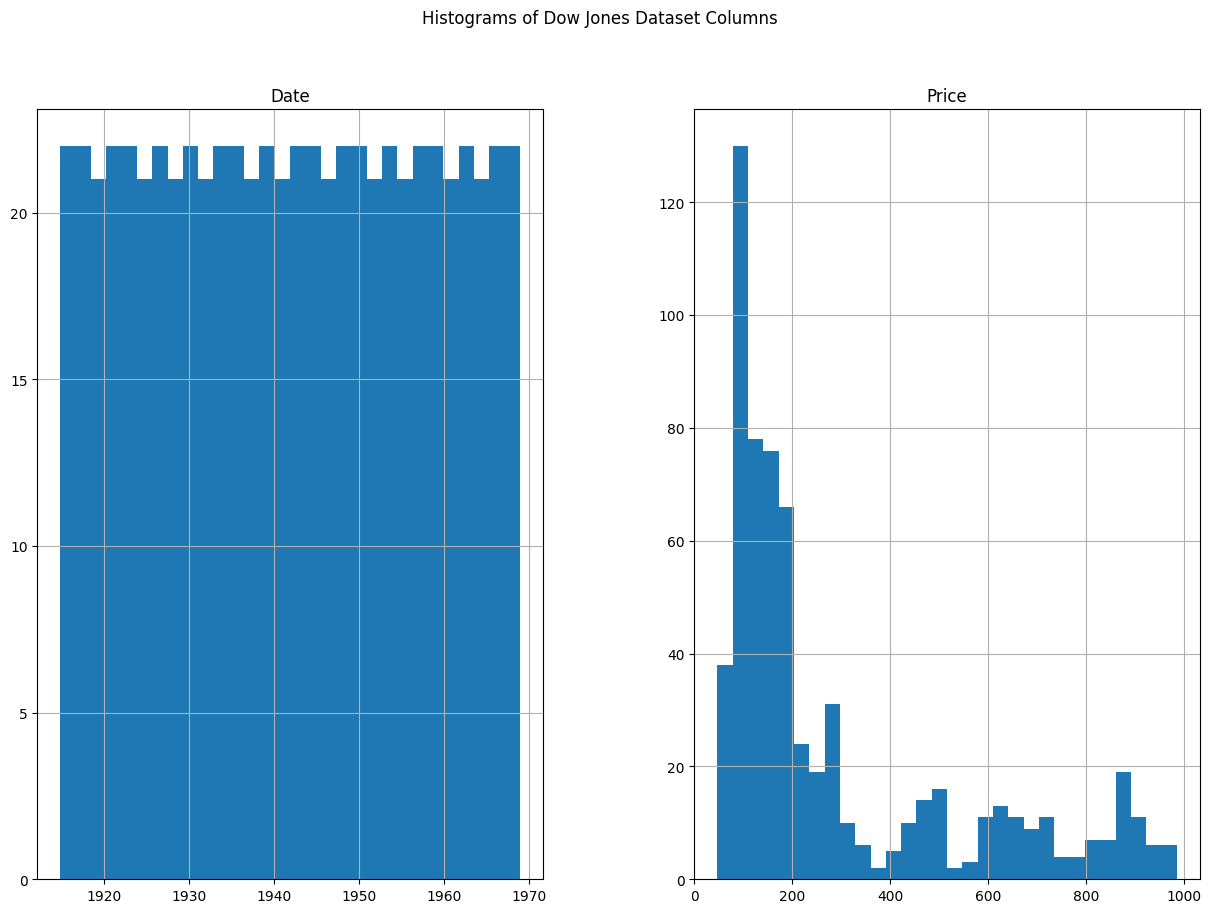

In [40]:
# Inspect histogram of the 'Price' column in the dowjones dataset
plt.figure(figsize=(10, 6))
dowjones["Price"].hist(bins=30)
plt.title("Distribution of Dow Jones Stock Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Inspect Histograms of all columns in the dowjones dataset
dowjones.hist(figsize=(15, 10), bins=30)
plt.suptitle("Histograms of Dow Jones Dataset Columns")
plt.show()



## Observation

first Graph between frequency and price shows a good idea of the average stock price. The date plot does not provide any useful information at all as this histogram is not suited for that type of data point. 

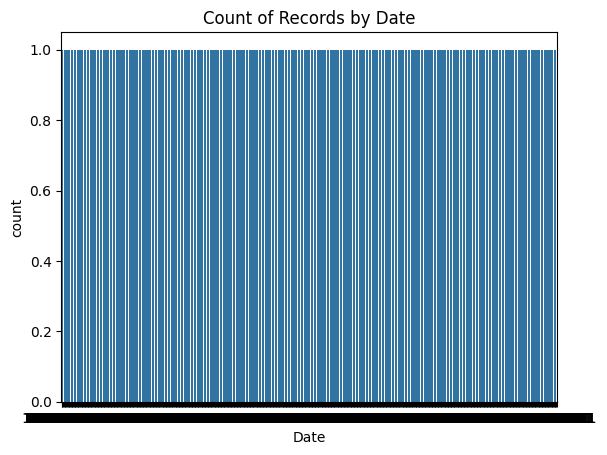

In [41]:
# Inspect value counts of the 'Date' column in the dowjones dataset
dowjones["Date"].value_counts()

# Display count plot of the 'Date' column
sns.countplot(x="Date", data=dowjones)
plt.title("Count of Records by Date")
plt.show()





## Observation

Ok, using count plot for this column is not the right approach as there are over 600 values. The X axis is completely unreadable and none of the information shows anything reliable due to the dataset. Best approach to this column is using a different plot chart.

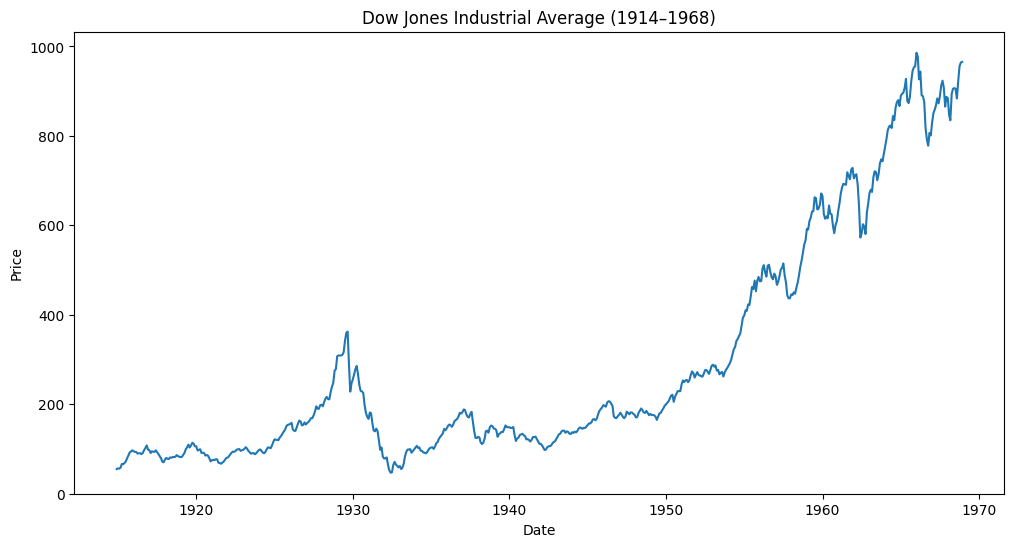

In [42]:
# Cleaning the Date column count plot by showing a comprehensible x-axis with fewer ticks

dowjones["Date"] = pd.to_datetime(dowjones["Date"])

plt.figure(figsize=(12,6))
plt.plot(dowjones["Date"], dowjones["Price"])
plt.title("Dow Jones Industrial Average (1914–1968)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


## OBSERVATION

Using a proper time-plot instead of countplot presents a more useful for these types of data. As it provides not only better visuals but proper information one can see within the graph itself.

## Section 5: Check Data Quality 

Standard process of checking for missing values and duplicate data. If there are missing values or duplicate data another section should be created to clean the data for future use.

In [43]:
# Count missing values in the dowjones dataset
print("Missing values in the dowjones dataset:")
print(dowjones.isnull().sum())

# If no missing values, print a message
if dowjones.isnull().sum().sum() == 0:
    print("No missing values found in the dowjones dataset.")


Missing values in the dowjones dataset:
Date     0
Price    0
dtype: int64
No missing values found in the dowjones dataset.


In [44]:
# Check for duplicate data in the dowjones dataset
duplicate_rows = dowjones.duplicated().sum()
print(f"Number of duplicate rows in the dowjones dataset: {duplicate_rows}")

if duplicate_rows > 0:
    print("Duplicate rows found in the dowjones dataset.")

Number of duplicate rows in the dowjones dataset: 0


## Section 6: Data Transformation and Engineering

The purpose of this section is to make the information more valuable by adjusting column names and using tools to get more out of this dataset.

In [45]:
# Rename Price column to Index_Price.
dowjones.rename(columns={"Price": "Index_Price"}, inplace=True)

# Confirm the name change by printing the column names
print(dowjones.columns)

Index(['Date', 'Index_Price'], dtype='str')


In [46]:
# Adding a Year column to the dowjones dataset for easier analysis
dowjones["Year"] = dowjones["Date"].dt.year

# Confirm the new column by printing the column names
print(dowjones.columns)

Index(['Date', 'Index_Price', 'Year'], dtype='str')


In [47]:
# Adding a Month column to the dowjones dataset for easier analysis
dowjones["Month"] = dowjones["Date"].dt.month

# Confirm the new column by printing the column names
print(dowjones.columns)

Index(['Date', 'Index_Price', 'Year', 'Month'], dtype='str')


In [48]:
# Add a Monthly change to calculate the monthly change in the Dow Jones index
dowjones["Monthly_Change"] = dowjones["Index_Price"].diff()

# Calculate the average monthly change in the Dow Jones index
average_monthly_change = dowjones["Monthly_Change"].mean()
print(f"Average monthly change in the Dow Jones index: {average_monthly_change:.2f}")

Average monthly change in the Dow Jones index: 1.40


In [49]:
# Add a Percentage change
dowjones["Percentage_Change"] = dowjones["Index_Price"].pct_change() * 100

# View updated dataset with new columns
print(dowjones.head())

        Date  Index_Price  Year  Month  Monthly_Change  Percentage_Change
0 1914-12-01        55.00  1914     12             NaN                NaN
1 1915-01-01        56.55  1915      1            1.55           2.818182
2 1915-02-01        56.00  1915      2           -0.55          -0.972591
3 1915-03-01        58.30  1915      3            2.30           4.107143
4 1915-04-01        66.45  1915      4            8.15          13.979417


## Section 7: Visualizations

The purpose of this section is to showcase different aspects of the Dowjones dataset.

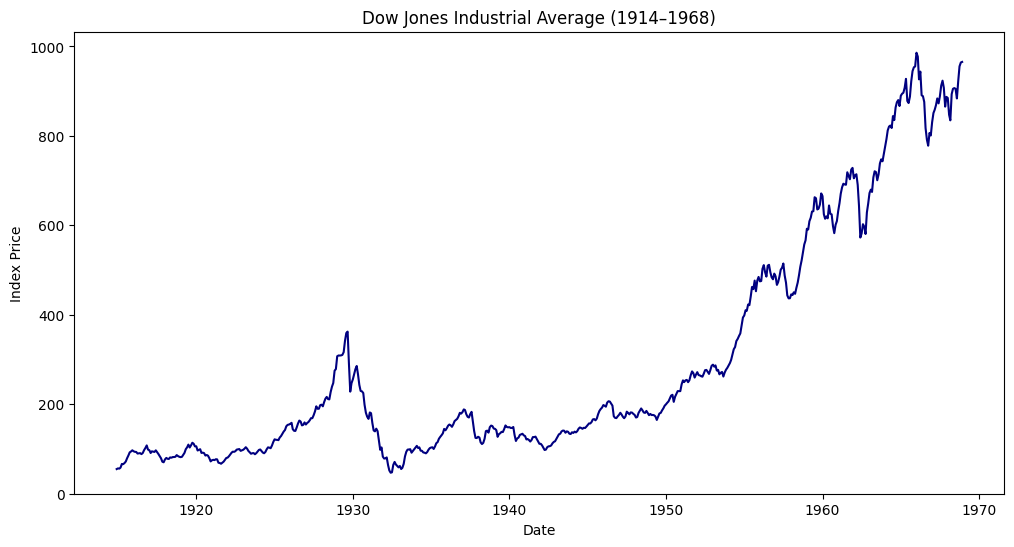

In [50]:
# Goal: What were the Dowjones industrial average trends from 1914 to 1968?

# Chart Type: Line chart to show the trend of the Dow Jones index over time

# Chart: Get the long term trend analysis
plt.figure(figsize=(12,6))
plt.plot(dowjones["Date"], dowjones["Index_Price"], color="navy")
plt.title("Dow Jones Industrial Average (1914–1968)")
plt.xlabel("Date")
plt.ylabel("Index Price")
plt.show()


# Story

The dowjones average shows an overall upward trend across the 54 year period. While there weas some major spikes during the 30s, overall long term its a positive growth. 

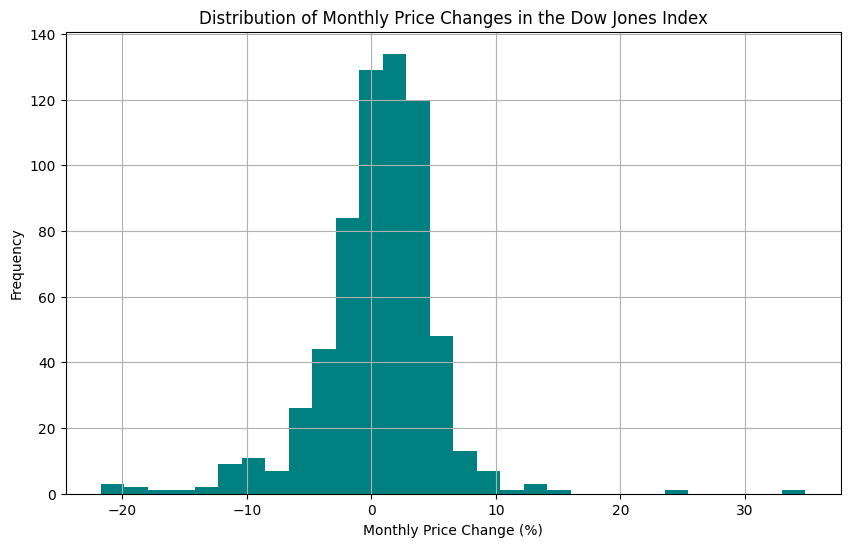

In [54]:
# Goal: How Volatile was the Monthly price changes?

# Chart Type: Histogram to show the distribution of monthly price changes

# Chart: Histogram of Monthly price changes
plt.figure(figsize=(10, 6))
dowjones["Percentage_Change"].hist(bins=30, color="teal")
plt.title("Distribution of Monthly Price Changes in the Dow Jones Index")
plt.xlabel("Monthly Price Change (%)")
plt.ylabel("Frequency")
plt.show()





# Story

Most monthly changes cluster around small movements, indicating moderate month-to-month variation. However, the larger spikes suggest periods of volatility, could be tied to major economic events. This distribution shows the short-term fluctuations were common.

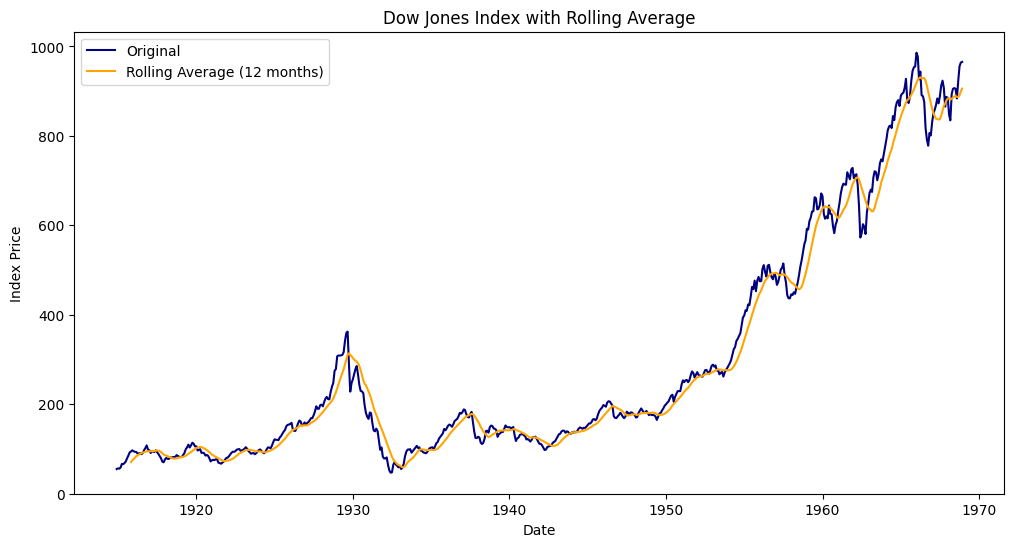

In [55]:
# Goal: How does smoothing Data change the trend of the Dow Jones index?

# Chart Type: Dual line chart to compare the original Dow Jones index with a smoothed version (e.g., using a rolling average)

# Chart: Dual line chart with original and smoothed data
plt.figure(figsize=(12,6))
plt.plot(dowjones["Date"], dowjones["Index_Price"], label="Original", color="navy")
dowjones["Rolling_Average"] = dowjones["Index_Price"].rolling(window=12).mean()
plt.plot(dowjones["Date"], dowjones["Rolling_Average"], label="Rolling Average (12 months)", color="orange")
plt.title("Dow Jones Index with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Index Price")
plt.legend()
plt.show()


# Story

The rolling average removes short term variations and reveals clearer long term trends in the index price. This helps make macroeconomics cycles easier to interpret!